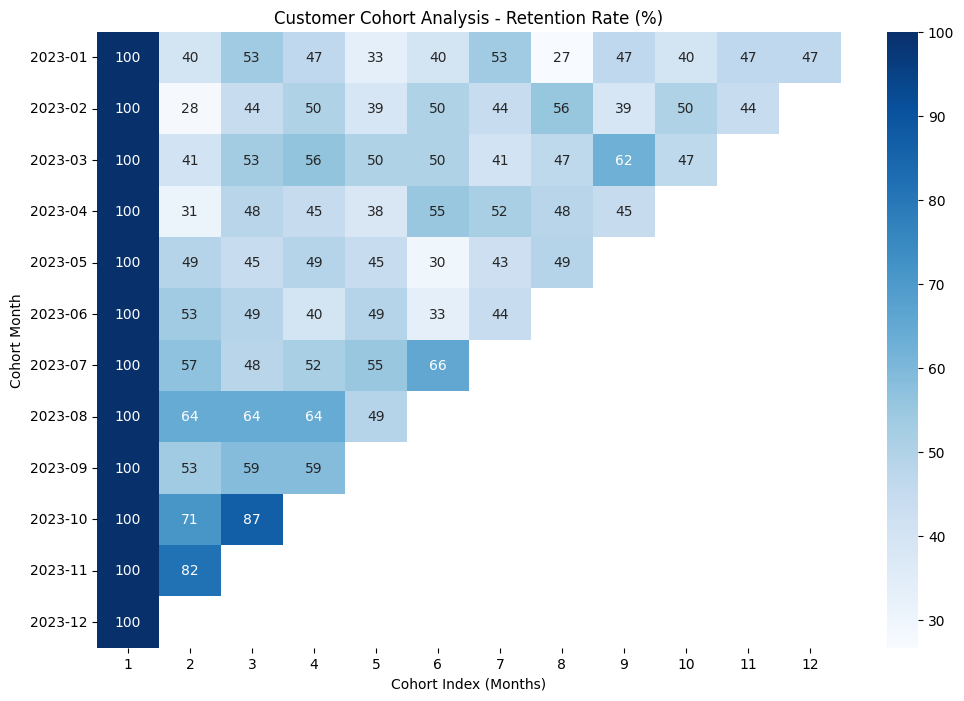

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load synthetic data (if needed)
df_synthetic = pd.read_csv(r'D:\Portfolio python\Customer cohort\synthetic_cohort_data.csv')

# Ensure correct data types
df_synthetic['order_date'] = pd.to_datetime(df_synthetic['order_date'])

# Add cohort month (first purchase month for each customer)
df_synthetic['cohort_month'] = df_synthetic.groupby('customer_id')['order_date'].transform('min').dt.to_period('M')

# Add order month
df_synthetic['order_month'] = df_synthetic['order_date'].dt.to_period('M')

# Calculate cohort index
df_synthetic['cohort_index'] = (
    (df_synthetic['order_month'].dt.year - df_synthetic['cohort_month'].dt.year) * 12 +
    (df_synthetic['order_month'].dt.month - df_synthetic['cohort_month'].dt.month)
) + 1

# Pivot table: count unique customers per cohort and cohort index
cohort_data = df_synthetic.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_id',
    aggfunc=pd.Series.nunique
)

# Calculate retention rates
cohort_size = cohort_data.iloc[:, 0]
retention_rate = cohort_data.divide(cohort_size, axis=0) * 100

# Visualize retention rate
plt.figure(figsize=(12, 8))
plt.title('Customer Cohort Analysis - Retention Rate (%)')
sns.heatmap(retention_rate, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.xlabel('Cohort Index (Months)')
plt.ylabel('Cohort Month')
plt.show()
